# Env preparing

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin
from pathlib import Path

In [2]:
path = Path('/content/drive/MyDrive/Colab_Notebooks/owid-covid-data.csv')

# Data

In [3]:
df = pd.read_csv(path)
assert 'Russia' in df.location.unique()

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Выберем range для тестового датасета и дату старта.

In [5]:
train_range = timedelta(days=50)
start_date = datetime(2020, 3, 3)

In [7]:
df_r = df[df.location == 'Russia']
df_r.date = pd.to_datetime(df_r.date)
df_r.loc[:, 'log_total'] = np.log(df_r.loc[:, 'total_cases'])
df_r.loc[:, 'day_num'] = (df_r.loc[:, 'date'] - start_date).dt.days + 1
df_train = df_r[(start_date <= df_r.date) & (df_r.date < start_date + train_range)].copy()
# df_train['day_num'] = (df_train.date - start_date).dt.days + 1

df_test = df_r[(df_r.date >= start_date + train_range)].copy()
# df_test['day_num'] = (df_test.date - start_date).dt.days + 1


/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [8]:
df_train.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,log_total,day_num
193365,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,NaN,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,1.098612,1
193366,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,NaN,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,1.098612,2
193367,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,1.386294,3
193368,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,2.564949,4
193369,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,NaN,...,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN,2.564949,5


# Visualisation

In [9]:
fig = px.line(df_train, y='total_cases', x="date", title="Общее число заболевших")
fig.show()

In [10]:
fig = px.line(df_train, y='new_cases', x="date", title="Прирост числа заболевших")
fig.show()

In [11]:
fig = px.line(df_test, y='total_cases', x="date", title="Общее число заболевших после 50 дней")
fig.show()

In [12]:
fig = px.line(df_test, y='new_cases', x="date", title="Прирост числа заболевших после 50 дня")
fig.show()

# Экспонента

## Linreg (MLE model)

In [13]:
from typing import List


def show_comp(
    x: np.ndarray,
    y1: np.ndarray,
    y2: np.ndarray,
    names: List[str],
    title: str
) -> None:
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=x,
            y=y1,
            name=names[0],
            mode='markers+lines',
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y2,
            name=names[1],
            mode='markers+lines',
        )
    )

    fig.update_layout(
        title=title,
    )

    fig.show()

Обучим функцию числа заболевших от времени вида $y \sim \exp(At + b)$. Чтобы обучить линейную регрессию, достаточно в качестве таргета взять логарифм.

In [14]:
x_train = df_train.day_num.to_numpy().reshape(-1, 1)

In [15]:
simple_lr_model = LinearRegression()
simple_lr_model.fit(x_train, df_train['log_total'])

LinearRegression()

In [16]:
preds = np.exp(simple_lr_model.predict(x_train))

show_comp(df_train.date, df_train.total_cases, preds, ['True', 'Predicted'], "Первые 50 дней")

По полученной модели максимального правдоподобия оценим дисперсию шума. Если считать, что разница между предсказанием модели и реальными данными и есть шум шум, тогда $prediction - target$ это выборка шума. Тогда, полагая шум распределённым нормально, можно посчитать несмещённую и состоятельную оценку сигмы

$$\sigma = \sqrt{\frac{\sum_1^n (x_i - x_{mean})^2}{n-1}}$$

Для предсказаний выберем данные до 13 апреля включительно (дальше модель явно сильно расходится).

In [17]:
def calc_noise(x: np.ndarray, target: np.ndarray, model: BaseEstimator) -> float:
    preds = model.predict(x)
    N = len(target)
    noise = target - preds[:N]
    mean = np.mean(noise)
    sq_sum = np.sum((noise - mean)**2) / (N - 1)
    return np.sqrt(sq_sum)

In [18]:
target = df_train[df_train.date <= datetime(2020, 4, 13)].log_total
noise_s = calc_noise(x_train, target, simple_lr_model)
print(f"Приближение дисперсии шума: {noise_s:.3f}")

Приближение дисперсии шума: 0.325


In [19]:
x_test = df_test.day_num.to_numpy().reshape(-1, 1)
preds = np.exp(simple_lr_model.predict(x_test)[:10])

show_comp(df_test.date[:10], df_test.total_cases[:10], preds, ['True', 'Predicted'], "После первых 50 дней")

## Bayesian Model (MAPE)



In [20]:
from typing import Tuple, Optional, Iterable
from scipy.stats import multivariate_normal

# Параметры априорного распределение
big_sigma = 500
mu_0, sigma_0 = np.array([0, 0]), big_sigma * np.eye(2)
inv_sigma_0 = sigma_0 / big_sigma ** 2

Функции обновления параметров распределения.

In [55]:
from tqdm.notebook import tqdm


class BayesianModel(BaseEstimator, RegressorMixin):
    def __init__(self, mu_0: np.ndarray, sigma_0: np.ndarray, noise_s: float, inv_sigma_0: Optional[np.ndarray] = None) -> None:
        self.mu = mu_0
        self.sigma = sigma_0

        if inv_sigma_0 is None:
            self.sigma_inv = np.linalg.inv(sigma_0)
        else:
            self.sigma_inv = inv_sigma_0
        
        self.noise = noise_s
    
    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        if x.shape[1] + 1 != self.sigma.shape[0]:
            raise ValueError("Wrong initial parameters shape.")

        for cx, cy in tqdm(zip(x, y)):
            x_mat = np.append([1], cx)[np.newaxis, :]
            y_mat = np.array([cy])
            self._update_params(x_mat, y_mat)
    
    def predict(
        self, 
        x: np.ndarray, *, 
        y: Optional[np.ndarray] = None, 
        n_samples: int = 100
    ) -> np.ndarray:
        regr = self._create_regressions(x, n_samples)
        return np.mean(regr, axis=0)
    
    def _update_params(self, x: np.ndarray, y: np.ndarray) -> None:
        sigma_n_inv = self.sigma_inv + 1 / self.noise**2 * x.T @ x
        sigma_n = np.linalg.inv(sigma_n_inv)
        mu_n = sigma_n @ (self.sigma_inv @ self.mu + 1 / self.noise ** 2 * x.T @ y)

        self.mu = mu_n
        self.sigma = sigma_n
        self.sigma_inv = sigma_n_inv


    def _create_regressions(self, x: np.ndarray, n_samples: int) -> List[np.ndarray]:
        """
        Samples distribution parameters and calculate target values using 'x'.
        Return list arrays of predicted on 'x' targets. 
        """
        regr = []
        x_mat = np.ones(shape=(len(x), len(self.mu)))

        try:
            x_mat[:, 1:] = x
        except ValueError:
            x_mat[:, 1:] = x[np.newaxis, :].T

        for _ in range(n_samples):
            w = np.random.multivariate_normal(self.mu, self.sigma)
            y = x_mat @ w.T
            regr.append(y)
        
        return regr

In [22]:
bay_model = BayesianModel(mu_0, sigma_0, noise_s)
x = df_train.day_num.to_numpy()
y = df_train.log_total.to_numpy()
bay_model.fit(x, y)

0it [00:00, ?it/s]

In [23]:
rs = bay_model._create_regressions(n_samples=10, x=x)

In [24]:
def plot_samplings(samples: List[np.ndarray], x: Iterable, y: np.ndarray, title: str):
    fig = go.Figure()

    for r in samples:
        fig.add_trace(
            go.Scatter(
                x=x,
                y=r,
                mode='lines',
                showlegend=False,
                line=dict(color="#95A5A6", width=1),
            )
        )

    fig.add_trace(
            go.Scatter(
                x=x,
                y=y,
                mode='markers+lines',
                name='Original line'
            )
        )

    fig.update_layout(
        title=title,
    )

    fig.show()

In [25]:
plot_samplings(
    rs,
    df_train.date,
    y,
    "Семлированные экспоненты в логарифмическом масштабе",
)

Посчитаем матожидание за последний (50-ый) день наблюдений в train.

In [26]:
target = y[-1]
exp_v = bay_model.predict(np.array([50]), n_samples=100).item()

print(f"Матожидание по распределению: степень - {exp_v:.3f}, число людей - {int(np.exp(exp_v))}")
print(f"Реальное значение: степень - {target:.3f}, число людей - {int(df_train.total_cases.to_numpy()[-1])}")

Матожидание по распределению: степень - 11.538, число людей - 102522
Реальное значение: степень - 10.874, число людей - 52763


In [27]:
fmay = np.array([(datetime(2020, 5, 1) - start_date).days + 1])
fjuly = np.array([(datetime(2020, 7, 1) - start_date).days + 1])
fsep = np.array([(datetime(2020, 9, 1) - start_date).days + 1])

exp_v = bay_model.predict(fmay, n_samples=100).item()
print(f"Число заболевших на 1 мая: {int(np.exp(exp_v))}")

exp_v = bay_model.predict(fjuly, n_samples=100).item()
print(f"Число заболевших на 1 июня: {int(np.exp(exp_v)):.2E}")

exp_v = bay_model.predict(fsep, n_samples=100).item()
print(f"Число заболевших на 1 сентября: {int(np.exp(exp_v)):.2E}")


Число заболевших на 1 мая: 728235
Число заболевших на 1 июня: 1.27E+11
Число заболевших на 1 сентября: 2.88E+16


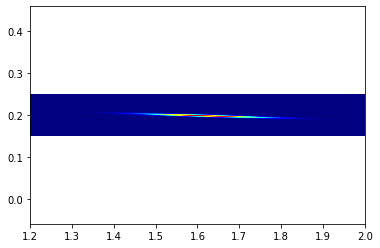

In [28]:
m, s = bay_model.mu, bay_model.sigma
N = 200
lx, rx = 1.2, 2
ly, ry = 0.15, 0.25

X = np.linspace(lx, rx, N)
Y = np.linspace(ly, ry, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=m, cov=s)
plt.axis('equal')
plt.xlim((lx, rx))
plt.ylim((ly, ry))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.show()

## Дисперсия шума

Пересчитаем, используя апостериорную вероятность

In [29]:
calc_noise(x, y, bay_model)

0.3525941998542507

Замечательно, но дальше нам это не понадобится. Потому что обучение следующей модели придётся делать на приросте числа заболевших, а не на общем количестве.

# Сигмоида

В качестве кривой общего числа заболеваний выберем следующую функцию, которая зависит от номера дня

$$f(x) = \int_{-\infty}^x \exp \left(-\frac{t^2}{2}  + С \right) \text{d}t$$

Понятно, что в дискретном случае интеграл превращается в сумму по дням, а подинтегральное выражение - это прирост заболевших за конкретный день (обозначим через $y$). В общем виде в экспоненте может стоять любая квадратичная функция от $t$.

$$y(t) = \exp(-(at^2 + bt + c))$$
$$g(t) = at^2 + bt + c = - \ln y$$

Для обучения линейной регрессии нужно добавить новую фичу $t^2$.

In [35]:
df_test.loc[(df_test.new_cases < 1), 'new_cases'] = 1
df_test.loc[:, 'neg_log_new'] = -np.log(df_test.loc[:, 'new_cases'])
df_test.loc[:, 'sq_day_num'] = df_test.loc[:, 'day_num'] ** 2

In [32]:
df_train.loc[(df_train.new_cases < 1), 'new_cases'] = 1
df_train.loc[:, 'neg_log_new'] = -np.log(df_train.loc[:, 'new_cases'])
df_train.loc[:, 'sq_day_num'] = df_train.loc[:, 'day_num'] ** 2

In [42]:
y = df_train.neg_log_new.to_numpy()
x = df_train.loc[:, ['day_num', 'sq_day_num']].to_numpy()

y_test = df_test.neg_log_new.to_numpy()
x_test = df_test.loc[:, ['day_num', 'sq_day_num']].to_numpy()

In [40]:
def y_to_new(y: np.ndarray) -> np.ndarray:
    return np.exp(-y)

def y_to_total(y: np.ndarray) -> np.ndarray:
    new_cases = y_to_new(y)
    return np.cumsum(new_cases)

## Linreg (MLE)



In [36]:
sigmoid_lr_model = LinearRegression()
sigmoid_lr_model.fit(x, y)

LinearRegression()

In [37]:
pred = sigmoid_lr_model.predict(x)
show_comp(
    df_train.date,
    pred,
    y,
    ["Predicted", "True values"],
    "-ln(new_cases)",
)

In [43]:
show_comp(
    df_train.date,
    y_to_new(pred),
    df_train.new_cases,
    ["Predicted", "True values"],
    "New cases. Train.",
)

In [44]:
pred = sigmoid_lr_model.predict(x_test)
show_comp(
    df_test.date,
    y_to_new(pred),
    df_test.new_cases,
    ["Predicted", "True values"],
    "New cases. Test.",
)

In [46]:
noise_s = calc_noise(x, y, sigmoid_lr_model)
print(f"Приближение дисперсии шума: {noise_s:.3f}")

Приближение дисперсии шума: 0.494


## Bayesian model (MAPE)

In [56]:
big_sigma = 500
mu_0, sigma_0 = np.array([0, 0, 0]), big_sigma * np.eye(3)
inv_sigma_0 = sigma_0 / big_sigma ** 2

sigmoid_bay_model = BayesianModel(mu_0, sigma_0, noise_s)
sigmoid_bay_model.fit(x, y)

0it [00:00, ?it/s]

In [53]:
rs = sigmoid_bay_model._create_regressions(n_samples=10, x=x)
rs_nc = [y_to_new(r) for r in rs]

plot_samplings(
    rs_nc,
    df_train.date,
    df_train.new_cases,
    "New cases",
)

In [54]:
rs_tc = [y_to_total(r) for r in rs]

plot_samplings(
    rs_tc,
    df_train.date,
    df_train.total_cases,
    "Total cases",
)

In [68]:
rs = sigmoid_bay_model._create_regressions(n_samples=10, x=x_test)
rs_nc = [y_to_new(r) for r in rs]

plot_samplings(
    rs_nc,
    df_test.date,
    df_test.new_cases,
    "New cases. Test",
)

In [69]:
rs_tc = [y_to_total(r) for r in rs]

plot_samplings(
    rs_tc,
    df_test.date,
    df_test.total_cases,
    "Total cases. Test",
)

Посмотрим на процентили.

In [70]:
prc = sigmoid_bay_model._create_regressions(n_samples=1000, x=x_test)
last_days = sorted([max(y_to_total(r)) for r in prc])

In [75]:
p90 = (last_days[899] + last_days[900]) // 2
p10 = (last_days[99] + last_days[100]) // 2
print(f"90 процентиль: {p90}")
print(f"10 процентиль: {p10}")


90 процентиль: 5453954.0
10 процентиль: 267203.0


In [80]:
pred = sigmoid_bay_model.predict(x_test)

show_comp(
    df_test.date,
    y_to_total(pred),
    df_test.total_cases,
    ["Predicted", "True values"],
    "Total cases. Mean model.",
)

In [81]:
show_comp(
    df_test.date,
    y_to_new(pred),
    df_test.new_cases,
    ["Predicted", "True values"],
    "New cases. Mean model.",
)

# Выводы

Судя по последней модели на малом количестве дней можно предсказать только локальные всплески заболеваемости. Исходя из данных по всем дням можно подумать, что количество заболеваний имеет локальные пики, каждый из которых выглядит как гауссиана и может быть приблизижен моделью с сигмоидой.

Возниконовение же подобных всплесков нужно предсказывать уже при помощи всех данных, потому что вероятно они зависят от множества параметров, в т.ч. параметров страны (система зравохранения, погода, плотность населения и тд), сезон года, принятые меры и др.